In [1]:
import os

from ml.eval import eval_model
from ml.models.MySimpleCNN_Feit import MySimpleCNNInceptionModule

print(os.getcwd())
os.chdir('/home/jelinek/recetox/')

from ml.pipeline import FeitDataPipeline

from cfg import *



name = "MySimpleCnn_Feit-inception-v2-large"


/home/jelinek/recetox/src/notebooks


In [3]:
pipeline = MySimpleCNNInceptionModule(train_data_dir='data/Feit_colon-annotation-tiles-256/data_train/',
                                      valid_data_dir='data/Feit_colon-annotation-tiles-256/data_valid/')

Model: "MySimpleCnnFewerLayers"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 256, 256, 8)  32          input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 256, 256, 8)  32          input_1[0][0]                    
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 256, 256, 3)  0           input_1[0][0]                    
_____________________________________________________________________________

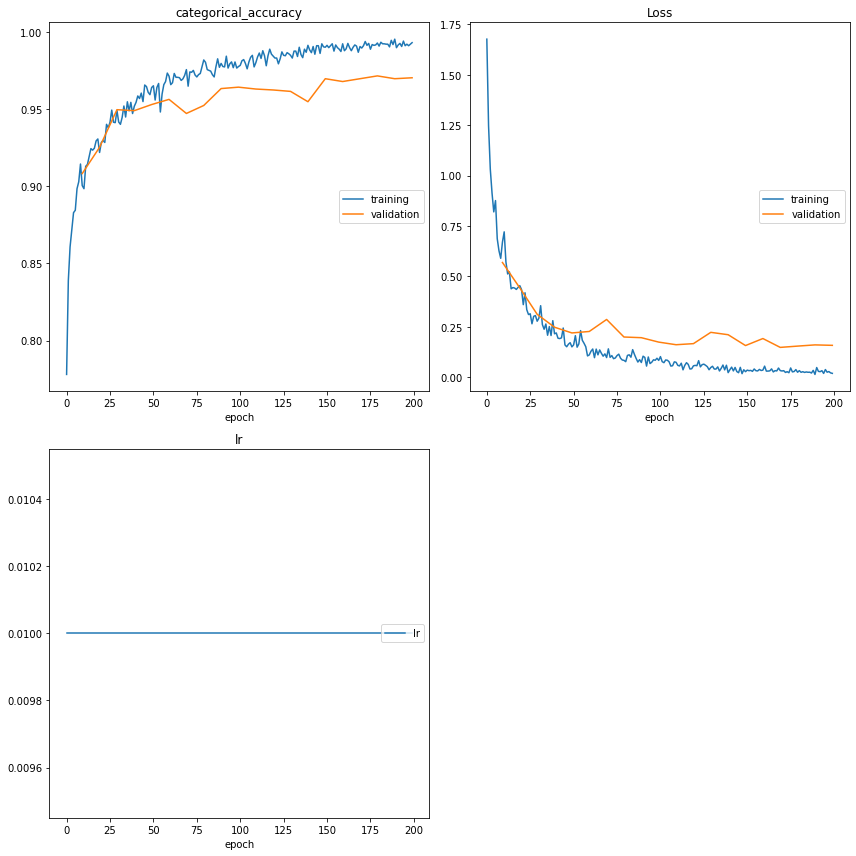

categorical_accuracy
	training         	 (min:    0.778, max:    0.996, cur:    0.993)
	validation       	 (min:    0.908, max:    0.972, cur:    0.970)
Loss
	training         	 (min:    0.014, max:    1.677, cur:    0.020)
	validation       	 (min:    0.148, max:    0.569, cur:    0.159)
lr
	lr               	 (min:    0.010, max:    0.010, cur:    0.010)
206/206 [==============================] - 10s 49ms/step - loss: 0.1585 - categorical_accuracy: 0.9705

In [4]:
pipeline.execute_pipeline(perform_validation=True, perform_test_segmentation=False)

In [5]:
pipeline.save_pipeline()

In [6]:
eval_model(pipeline.model,
           pipeline.get_data_loader_validation(),
           print_confusion_matrix=True,
           save_misclassified=True)

Found 3283 images belonging to 12 classes.
206/206 [==============================] - 10s 49ms/step - loss: 0.1585 - categorical_accuracy: 0.9705

In [7]:
pipeline = FeitDataPipeline.load_pipeline(pipeline_name=name)

In [8]:
file = Path('data/Kather_10-large/CRC-Prim-HE-03_APPLICATION.tif')
pipeline.perform_segmentation(file, step=64)

Segmenting file 1 out of 1


In [ ]:
path = Path('data/Kather_5000')
from util.data_manipulation_scripts import generate_image_annotation_pairs

tiffs, _ = generate_image_annotation_pairs(Path('data/Feit_colon-annotation'))
for tiff in tiffs:
    pipeline.perform_segmentation(tiff, step=16)


Segmenting file 1 out of 1
Processing region 104 out of 104
Processing image took 8636.82307434082 seconds
Segmenting file 1 out of 1
Processing region 112 out of 112
Processing image took 10392.17031621933 seconds


In [ ]:
from ml.eval import evaluate_segmentation_on_feit_annotation

evaluation_path = Path('data/Feit_colon-annotation_valid')

evaluate_segmentation_on_feit_annotation(evaluation_path, pipeline.build_segmenter(),
                                         256, pipeline.params.class_names)